In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [304]:
ds1 = pd.read_csv("leetcode_ds1.csv")
ds2 = pd.read_csv("leetcode_ds2.csv")
df_map_to_problem = pd.read_csv("table_df.csv")
print(ds1.columns)
print(ds2.columns)
print(df_map.columns)

Index(['id', 'title', 'description', 'is_premium', 'difficulty',
       'solution_link', 'acceptance_rate', 'frequency', 'url', 'discuss_count',
       'accepted', 'submissions', 'companies', 'related_topics', 'likes',
       'dislikes', 'rating', 'asked_by_faang', 'similar_questions'],
      dtype='object')
Index(['Question ID', 'Question Title', 'Question Slug', 'Question Text',
       'Topic Tagged text', 'Difficulty Level', 'Success Rate',
       'total submission', 'total accepted', 'Likes', 'Dislikes', 'Hints',
       'Similar Questions ID', 'Similar Questions Text'],
      dtype='object')
Index(['ID', 'Problem'], dtype='object')


In [305]:
df_map_to_problem.head()

,Unnamed: 0,#,Problem,Solution
0,0,----,---------------------------------------------...,---------------------------------------------...
1,1,1,[Two Sum](https://leetcode.com/problems/two-s...,[python3](https://github.com/cnkyrpsgl/leetco...
2,2,2,[Add Two Numbers](https://leetcode.com/proble...,[python3](https://github.com/cnkyrpsgl/leetco...
3,3,3,[Longest Substring Without Repeating Characte...,[python3](https://github.com/cnkyrpsgl/leetco...
4,4,4,[Median of Two Sorted Arrays](https://leetcod...,[python3](https://github.com/cnkyrpsgl/leetco...


In [306]:
df_map = df_map_to_problem.iloc[:, 1:]
df_map = df_map.rename(columns={df_map.columns[0]:"ID", df_map.columns[1]: "Problem", df_map.columns[2]: "Solution"})
df_map = df_map.drop(columns={"Solution"})
df_map = df_map.iloc[1:, :]
df_map.Problem = df_map.Problem.apply(lambda x: x.strip().split(']')[0].replace('[', ''))
df_map.head()

,ID,Problem
1,1,Two Sum
2,2,Add Two Numbers
3,3,Longest Substring Without Repeating Characters
4,4,Median of Two Sorted Arrays
5,5,Longest Palindromic Substring


In [307]:
# Changing all file names to the problem instead of ID
root_path = "./leetcode/solutions/python3/"
def change_file_name(path, df):
    full_path = root_path + str(path).strip() +".py"
    if os.path.exists(full_path):
        new_full_path = "-".join(str(df[df["ID"]==path].Problem).lower().split('name:')[0].split()[1:]).replace("(", "").replace(")", "")
        new_full_path = root_path + new_full_path + ".py"
        os.rename(full_path, new_full_path)

df_map['ID'].apply(lambda x: change_file_name(x, df_map))

1       None
2       None
3       None
4       None
5       None
        ... 
1154    None
1155    None
1156    None
1157    None
1158    None
Name: ID, Length: 1158, dtype: object

In [308]:
print(ds1.info(), "\n")
print(ds2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1825 non-null   int64  
 1   title              1825 non-null   object 
 2   description        1825 non-null   object 
 3   is_premium         1825 non-null   int64  
 4   difficulty         1825 non-null   object 
 5   solution_link      987 non-null    object 
 6   acceptance_rate    1825 non-null   float64
 7   frequency          1825 non-null   float64
 8   url                1825 non-null   object 
 9   discuss_count      1825 non-null   int64  
 10  accepted           1825 non-null   object 
 11  submissions        1825 non-null   object 
 12  companies          1749 non-null   object 
 13  related_topics     1571 non-null   object 
 14  likes              1825 non-null   int64  
 15  dislikes           1825 non-null   int64  
 16  rating             1825 

In [309]:
# Changing the column names to match and dropping useless columns
ds1 = ds1.rename(columns={"id": "Question ID", "title": "Question Title", "difficulty": "Difficulty Level", "similar_questions": "Similar Questions Text", "solution_link": "Solution Link"})
ds1 = ds1[["Question ID", "Question Title", "Difficulty Level", "Similar Questions Text", "Solution Link", "url"]]
ds1 = ds1.set_index("Question ID")
ds1.head()

,Question Title,Difficulty Level,Similar Questions Text,Solution Link,url
Question ID,,,,,
1,Two Sum,Easy,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl...",/articles/two-sum,https://leetcode.com/problems/two-sum
2,Add Two Numbers,Medium,"[Multiply Strings, /problems/multiply-strings/...",/articles/add-two-numbers,https://leetcode.com/problems/add-two-numbers
3,Longest Substring Without Repeating Characters,Medium,[Longest Substring with At Most Two Distinct C...,/articles/longest-substring-without-repeating-...,https://leetcode.com/problems/longest-substrin...
4,Median of Two Sorted Arrays,Hard,NaN,/articles/median-of-two-sorted-arrays,https://leetcode.com/problems/median-of-two-so...
5,Longest Palindromic Substring,Medium,"[Shortest Palindrome, /problems/shortest-palin...",/articles/longest-palindromic-substring,https://leetcode.com/problems/longest-palindro...


In [310]:
# Dropping useless columns in ds2
ds2 = ds2[["Question ID", "Question Title", "Difficulty Level", "Similar Questions Text", "Question Text"]]
ds2 = ds2.set_index("Question ID")
ds2.head()

,Question Title,Difficulty Level,Similar Questions Text,Question Text
Question ID,,,,
1,Two Sum,Easy,"3Sum,4Sum,Two Sum II - Input Array Is Sorted,T...",Given an array of integers nums and an integer...
2,Add Two Numbers,Medium,"Multiply Strings,Add Binary,Sum of Two Integer...",You are given two non-empty linked lists repre...
3,Longest Substring Without Repeating Characters,Medium,Longest Substring with At Most Two Distinct Ch...,"Given a string s, find the length of the longe..."
4,Median of Two Sorted Arrays,Hard,NaN,Given two sorted arrays nums1 and nums2 of siz...
5,Longest Palindromic Substring,Medium,"Shortest Palindrome,Palindrome Permutation,Pal...","Given a string s, return the longest palindrom..."


In [311]:
# Merging the two datasets and making a couple of changes
merged = pd.merge(ds1, ds2, on="Question ID", how="inner")
dupplicate_columns = [x for x in merged.columns if x.endswith("_y")]
merged = merged.drop(dupplicate_columns, axis=1)
merged = merged.rename(columns={x: x.replace("_x", "") for x in merged.columns})
# merged = merged.dropna()
# merged["Solution Link"] = merged["Solution Link"].apply(lambda x: "https://leetcode.com" + x)
merged.head()

,Question Title,Difficulty Level,Similar Questions Text,Solution Link,url,Question Text
Question ID,,,,,,
1,Two Sum,Easy,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl...",/articles/two-sum,https://leetcode.com/problems/two-sum,Given an array of integers nums and an integer...
2,Add Two Numbers,Medium,"[Multiply Strings, /problems/multiply-strings/...",/articles/add-two-numbers,https://leetcode.com/problems/add-two-numbers,You are given two non-empty linked lists repre...
3,Longest Substring Without Repeating Characters,Medium,[Longest Substring with At Most Two Distinct C...,/articles/longest-substring-without-repeating-...,https://leetcode.com/problems/longest-substrin...,"Given a string s, find the length of the longe..."
4,Median of Two Sorted Arrays,Hard,NaN,/articles/median-of-two-sorted-arrays,https://leetcode.com/problems/median-of-two-so...,Given two sorted arrays nums1 and nums2 of siz...
5,Longest Palindromic Substring,Medium,"[Shortest Palindrome, /problems/shortest-palin...",/articles/longest-palindromic-substring,https://leetcode.com/problems/longest-palindro...,"Given a string s, return the longest palindrom..."


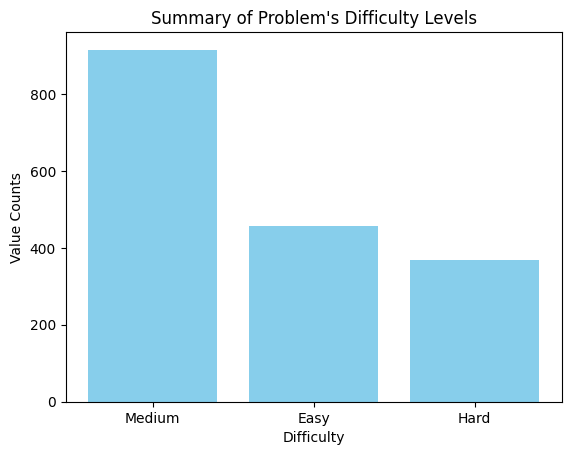

In [312]:
plt.bar(merged["Difficulty Level"].value_counts().index, merged["Difficulty Level"].value_counts().values, color='skyblue')

plt.xlabel('Difficulty')
plt.ylabel('Value Counts')
plt.title("Summary of Problem's Difficulty Levels")

plt.show()

In [313]:
merged_only_important_cols = merged[['Question Title', 'Question Text']].copy()
merged_only_important_cols.head()

,Question Title,Question Text
Question ID,,
1,Two Sum,Given an array of integers nums and an integer...
2,Add Two Numbers,You are given two non-empty linked lists repre...
3,Longest Substring Without Repeating Characters,"Given a string s, find the length of the longe..."
4,Median of Two Sorted Arrays,Given two sorted arrays nums1 and nums2 of siz...
5,Longest Palindromic Substring,"Given a string s, return the longest palindrom..."


In [314]:
python_solution_path = "./leetcode/solutions/python3/"

merged_only_important_cols['Solution_Path'] = merged_only_important_cols['Question Title'].str.lower()
merged_only_important_cols['Solution_Path'] = merged_only_important_cols['Solution_Path'].apply(lambda x: python_solution_path + "-".join(x.split()) + ".py")
merged_only_important_cols["Solution_Exists"] = merged_only_important_cols['Solution_Path'].apply(lambda x: os.path.isfile(x))
print(merged_only_important_cols['Solution_Exists'].value_counts())
final_merged = merged_only_important_cols[merged_only_important_cols['Solution_Exists'] == True].copy()

Solution_Exists
True     1060
False     681
Name: count, dtype: int64


In [315]:
def delete_comments(path):
    with open(path, 'r') as file:
        lines = file.readlines()

    with open(path, 'w') as file:
        for line in lines:
            if not line.strip().startswith("#"):
                file.write(line)
        
for path in final_merged["Solution_Path"]:
    delete_comments(path)

In [316]:
final_merged.to_csv("merged.csv")
final_merged.head()

,Question Title,Question Text,Solution_Path,Solution_Exists
Question ID,,,,
1,Two Sum,Given an array of integers nums and an integer...,./leetcode/solutions/python3/two-sum.py,True
2,Add Two Numbers,You are given two non-empty linked lists repre...,./leetcode/solutions/python3/add-two-numbers.py,True
3,Longest Substring Without Repeating Characters,"Given a string s, find the length of the longe...",./leetcode/solutions/python3/longest-substring...,True
4,Median of Two Sorted Arrays,Given two sorted arrays nums1 and nums2 of siz...,./leetcode/solutions/python3/median-of-two-sor...,True
5,Longest Palindromic Substring,"Given a string s, return the longest palindrom...",./leetcode/solutions/python3/longest-palindrom...,True


In [320]:
test = final_merged.iloc[14, -2]
print(os.path.isfile(test))
print(test)

True
./leetcode/solutions/python3/3sum-closest.py
